Data Preparation
Goal: Prepare the data you’ll use for portfolio analysis.

Load price data (e.g., from Yahoo Finance or CSVs).

Clean and align timestamps, remove NaNs, and compute daily returns.

Optionally: add market-cap weights if available.



In [147]:
import yfinance as yf
from plotly.express.trendline_functions import rolling

In [148]:
from datetime import date

start = date(2020, 1, 1)
end = date.today()

In [149]:
tickers = ["AAPL", "MSFT", "GOOG", "META"]
stocks = yf.download(tickers, start=start, end=end, auto_adjust=False)
stocks = stocks[["Close"]]
stocks

[*********************100%***********************]  4 of 4 completed


Price            Close                                    
Ticker            AAPL        GOOG        META        MSFT
Date                                                      
2020-01-02   75.087502   68.368500  209.779999  160.619995
2020-01-03   74.357498   68.032997  208.669998  158.619995
2020-01-06   74.949997   69.710503  212.600006  159.029999
2020-01-07   74.597504   69.667000  213.059998  157.580002
2020-01-08   75.797501   70.216003  215.220001  160.089996
...                ...         ...         ...         ...
2025-11-03  269.049988  284.119995  637.710022  517.030029
2025-11-04  270.040009  278.059998  627.320007  514.330017
2025-11-05  270.140015  284.750000  635.950012  507.160004
2025-11-06  269.769989  285.339996  618.940002  497.100006
2025-11-07  268.470001  279.700012  621.710022  496.820007

[1472 rows x 4 columns]

<Axes: title={'center': 'Stock Prices over the last five years'}, xlabel='Date'>

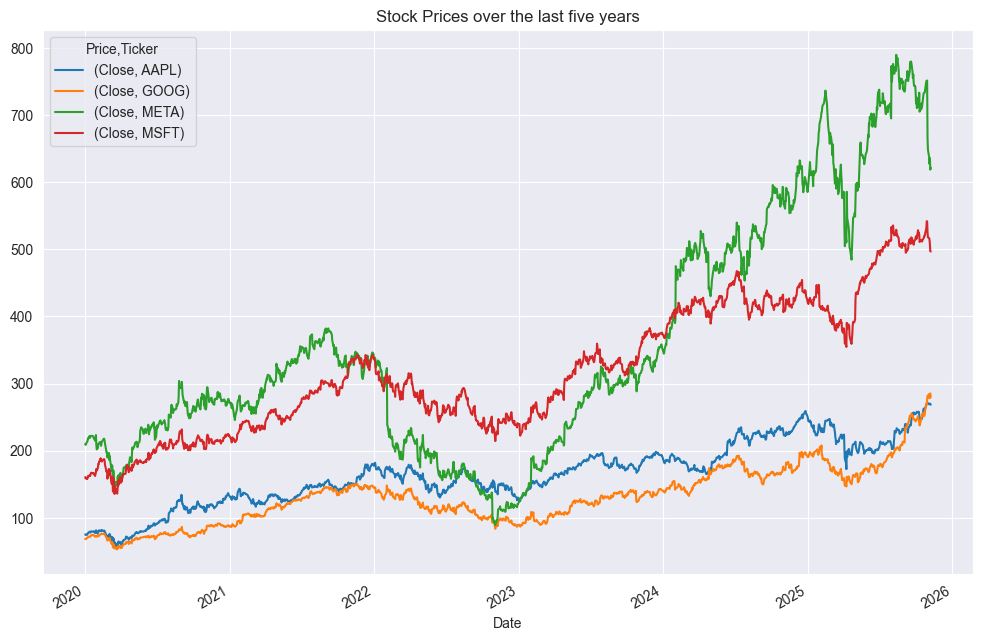

In [150]:
stocks.plot(title = "Stock Prices over the last five years", figsize = (12, 8))

In [151]:
import numpy as np

In [152]:
log_returns = np.log(stocks/stocks.shift(1))
log_returns = log_returns.dropna()
log_returns

Price          Close                              
Ticker          AAPL      GOOG      META      MSFT
Date                                              
2020-01-03 -0.009770 -0.004919 -0.005305 -0.012530
2020-01-06  0.007937  0.024358  0.018658  0.002581
2020-01-07 -0.004714 -0.000624  0.002161 -0.009160
2020-01-08  0.015958  0.007850  0.010087  0.015803
2020-01-09  0.021018  0.010984  0.014210  0.012416
...              ...       ...       ...       ...
2025-11-03 -0.004894  0.008128 -0.016547 -0.001507
2025-11-04  0.003673 -0.021560 -0.016427 -0.005236
2025-11-05  0.000370  0.023775  0.013663 -0.014039
2025-11-06 -0.001371  0.002070 -0.027112 -0.020035
2025-11-07 -0.004831 -0.019964  0.004465 -0.000563

[1471 rows x 4 columns]

In [153]:
lin_returns = stocks / stocks.shift(1) - 1
lin_returns = lin_returns.dropna()
lin_returns

Price          Close                              
Ticker          AAPL      GOOG      META      MSFT
Date                                              
2020-01-03 -0.009722 -0.004907 -0.005291 -0.012452
2020-01-06  0.007968  0.024657  0.018834  0.002585
2020-01-07 -0.004703 -0.000624  0.002164 -0.009118
2020-01-08  0.016086  0.007880  0.010138  0.015928
2020-01-09  0.021241  0.011044  0.014311  0.012493
...              ...       ...       ...       ...
2025-11-03 -0.004882  0.008161 -0.016411 -0.001506
2025-11-04  0.003680 -0.021329 -0.016293 -0.005222
2025-11-05  0.000370  0.024060  0.013757 -0.013940
2025-11-06 -0.001370  0.002072 -0.026747 -0.019836
2025-11-07 -0.004819 -0.019766  0.004475 -0.000563

[1471 rows x 4 columns]

Portfolio Construction
Goal: Build different portfolio types.

Equal-weighted portfolio: assign the same weight to each stock.

Market-cap weighted portfolio: assign weights proportional to each stock’s market capitalization.

Compute daily portfolio returns by multiplying asset returns by weights.

In [154]:
equal_weights = 1/len(tickers)

In [155]:
import pandas as pd

In [156]:
portfolio_returns_equal_weights = (lin_returns * equal_weights).sum(axis=1)
portfolio_returns_equal_weights = pd.DataFrame(portfolio_returns_equal_weights, columns = ["Equally-weighted Portfolio Returns"])
portfolio_returns_equal_weights

,Equally-weighted Portfolio Returns
Date,
2020-01-03,-0.008093
2020-01-06,0.013511
2020-01-07,-0.003070
2020-01-08,0.012508
2020-01-09,0.014772
...,...
2025-11-03,-0.003660
2025-11-04,-0.009791
2025-11-05,0.006062


<Axes: title={'center': 'Equally-weighted Portfolio Returns'}, xlabel='Date'>

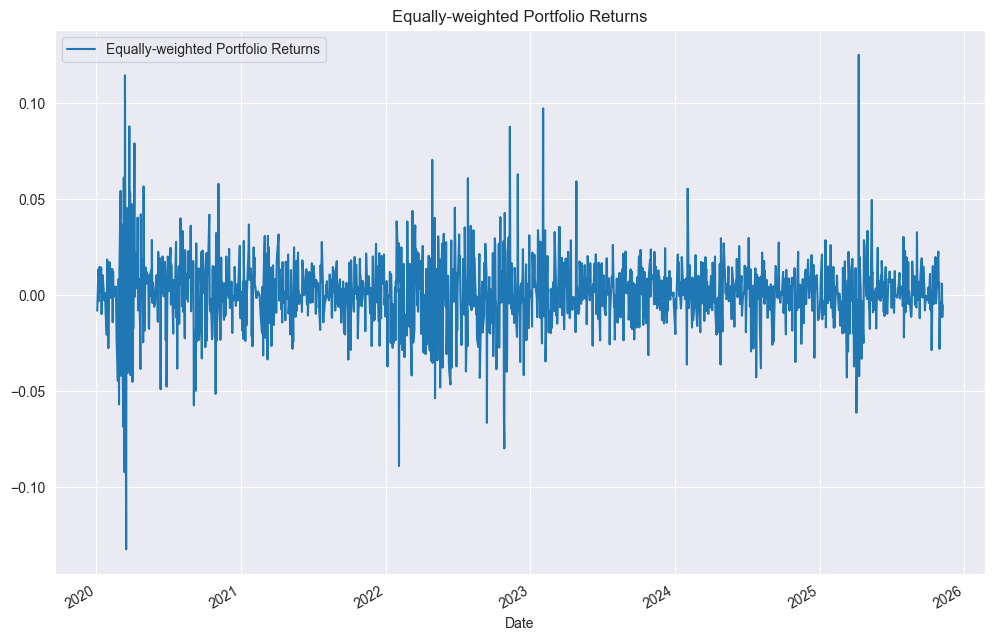

In [157]:
portfolio_returns_equal_weights.plot(title = "Equally-weighted Portfolio Returns", figsize = (12, 8))

In [158]:
import pandas as pd
import numpy as np

marketCap = []
for i in tickers:
    cap = yf.Ticker(i).info["marketCap"]
    marketCap.append(cap)
marketCap = pd.DataFrame(marketCap, index=tickers, columns=["Market Caps"])
marketCap

,Market Caps
AAPL,3982522318848
MSFT,3759296741376
GOOG,3504745742336
META,1594019414016


In [159]:
marketCap_weights = marketCap/marketCap.sum()
print(marketCap_weights)

      Market Caps
AAPL     0.310151
MSFT     0.292767
GOOG     0.272943
META     0.124139


In [160]:
portfolio_returns_marketCap_weights = (lin_returns.droplevel(0, axis=1) @ marketCap_weights).sum(axis=1)
portfolio_returns_marketCap_weights= pd.DataFrame(portfolio_returns_marketCap_weights, columns = ["Market-weighted Portfolio Returns"])
portfolio_returns_marketCap_weights

,Market-weighted Portfolio Returns
Date,
2020-01-03,-0.008657
2020-01-06,0.012296
2020-01-07,-0.004030
2020-01-08,0.013062
2020-01-09,0.015036
...,...
2025-11-03,-0.001765
2025-11-04,-0.008232
2025-11-05,0.004308


<Axes: title={'center': 'Market-weighted Portfolio Returns'}, xlabel='Date'>

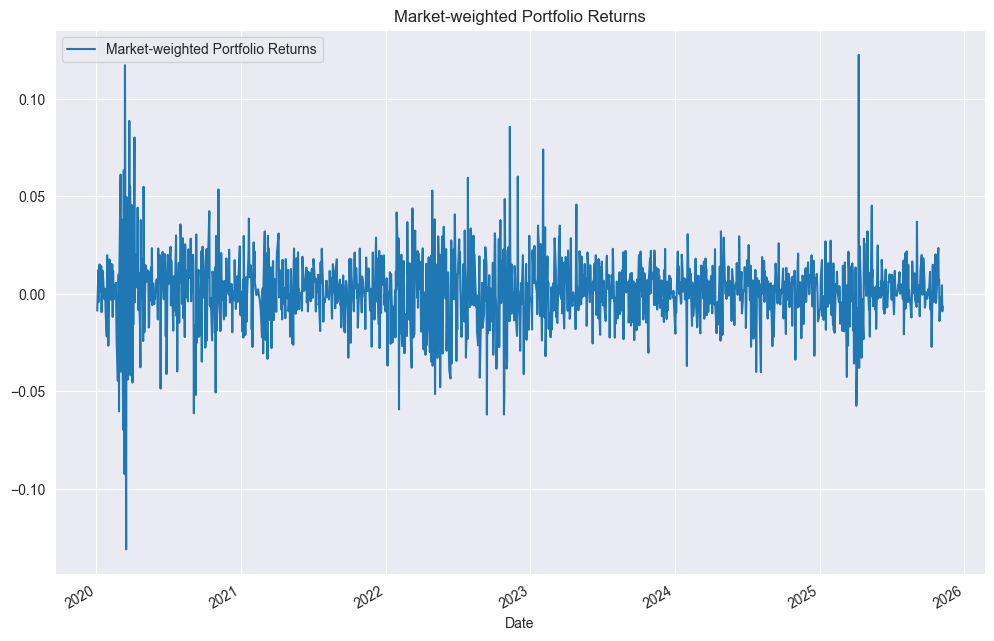

In [161]:
portfolio_returns_marketCap_weights.plot(title = "Market-weighted Portfolio Returns", figsize = (12, 8))

<Axes: title={'center': 'Weighted Portfolio Returns'}, xlabel='Date'>

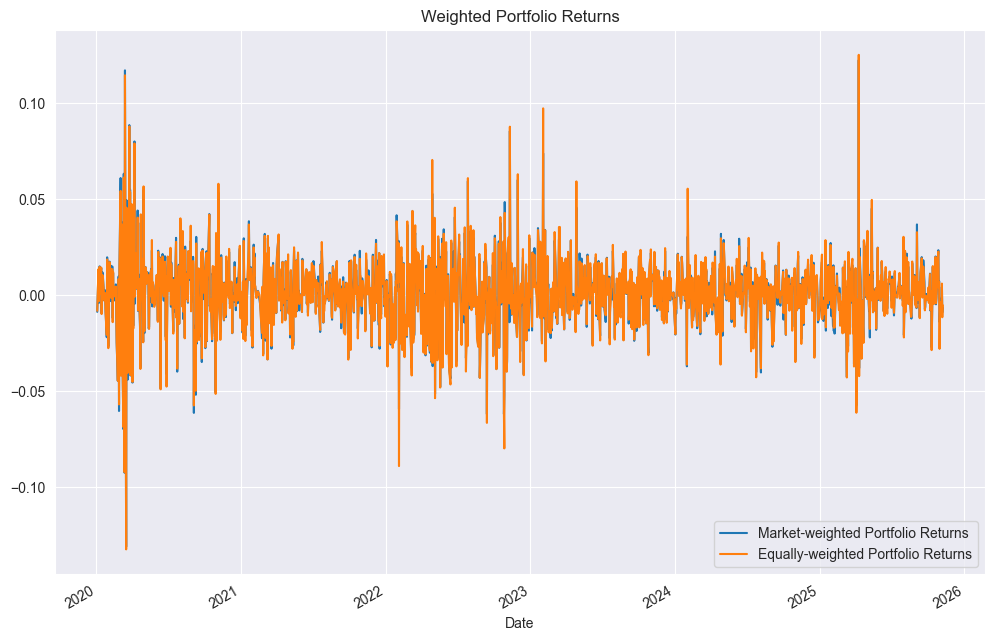

In [162]:
combined = pd.concat([portfolio_returns_marketCap_weights,portfolio_returns_equal_weights], axis=1)
combined.plot(title = "Weighted Portfolio Returns", figsize = (12, 8))

Performance Metrics
Goal: Measure risk and return.

Compute annualized return and annualized volatility.

Calculate Sharpe ratio (return per unit of risk).

Calculate Sortino ratio (return per unit of downside risk).

Compute maximum drawdown and plot cumulative returns.



In [163]:
y_avg_return = pd.DataFrame( index = ["Average Yearly Returns"] )
for i in log_returns:
    y_avg_return[i] = np.mean(log_returns[i])*250
y_avg_return

,"(Close, AAPL)","(Close, GOOG)","(Close, META)","(Close, MSFT)"
Average Yearly Returns,0.216534,0.23943,0.184639,0.191908


In [164]:
mu_y=(log_returns.mean()*250).to_frame().T
sigma_y = (log_returns.std()*np.sqrt(250)).to_frame().T
y_stats = pd.concat([mu_y,sigma_y])
y_stats.index = ["Average Yearly Returns", "Yearly Volatility"]
y_stats

Price                      Close                              
Ticker                      AAPL      GOOG      META      MSFT
Average Yearly Returns  0.216534  0.239430  0.184639  0.191908
Yearly Volatility       0.319201  0.322173  0.444245  0.296331

In [165]:
sharpe_ratio  = (y_stats.loc["Average Yearly Returns"]/y_stats.loc["Yearly Volatility"]).to_frame().T
sharpe_ratio.index = ["Sharpe Ratio"]
y_stats = pd.concat([y_stats,sharpe_ratio])
y_stats

Price                      Close                              
Ticker                      AAPL      GOOG      META      MSFT
Average Yearly Returns  0.216534  0.239430  0.184639  0.191908
Yearly Volatility       0.319201  0.322173  0.444245  0.296331
Sharpe Ratio            0.678363  0.743171  0.415624  0.647613

In [166]:
negative_returns = log_returns[log_returns<0]
downside_vol = (negative_returns.std()*np.sqrt(250)).to_frame().T
downside_vol.index = ["Downside Volatility"]
y_stats = pd.concat([y_stats,downside_vol], axis=0)
y_stats


Price                      Close                              
Ticker                      AAPL      GOOG      META      MSFT
Average Yearly Returns  0.216534  0.239430  0.184639  0.191908
Yearly Volatility       0.319201  0.322173  0.444245  0.296331
Sharpe Ratio            0.678363  0.743171  0.415624  0.647613
Downside Volatility     0.233827  0.237086  0.363997  0.219108

In [167]:
sortino_vol = (y_stats.loc["Average Yearly Returns"]/y_stats.loc["Downside Volatility"]).to_frame().T
sortino_vol.index = ["Sortino Ratio"]
y_stats = pd.concat([y_stats,sortino_vol], axis=0)
y_stats

Price                      Close                              
Ticker                      AAPL      GOOG      META      MSFT
Average Yearly Returns  0.216534  0.239430  0.184639  0.191908
Yearly Volatility       0.319201  0.322173  0.444245  0.296331
Sharpe Ratio            0.678363  0.743171  0.415624  0.647613
Downside Volatility     0.233827  0.237086  0.363997  0.219108
Sortino Ratio           0.926041  1.009888  0.507253  0.875861

<Axes: title={'center': 'Cumulative Returns'}, xlabel='Date'>

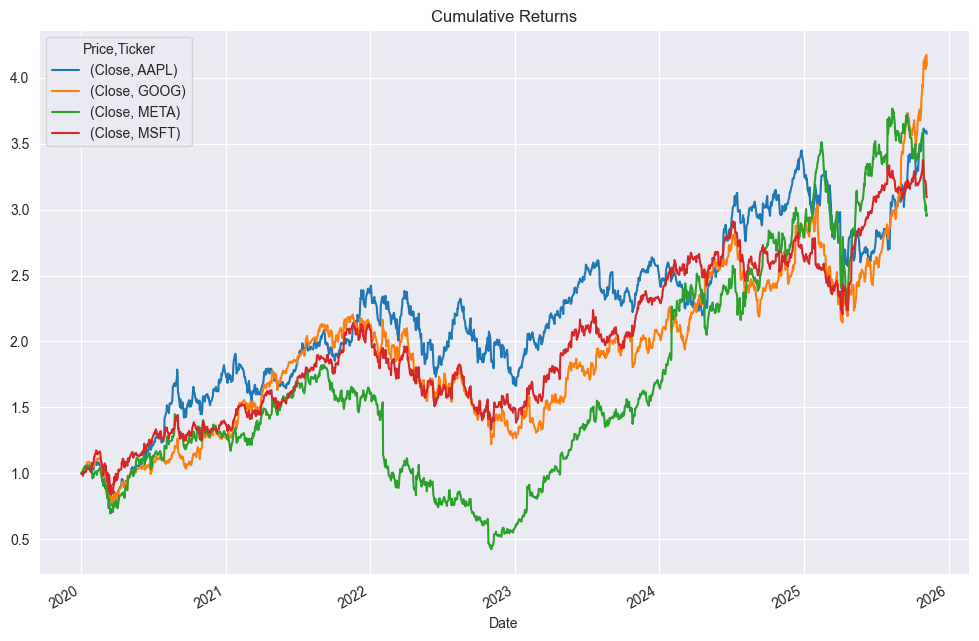

In [168]:
cumulative_returns = (1 + lin_returns).cumprod()
cumulative_returns.iloc[0] = 1
cumulative_returns.plot(title = "Cumulative Returns", figsize = (12, 8))

<Axes: title={'center': 'Max Drowdown'}, xlabel='Date'>

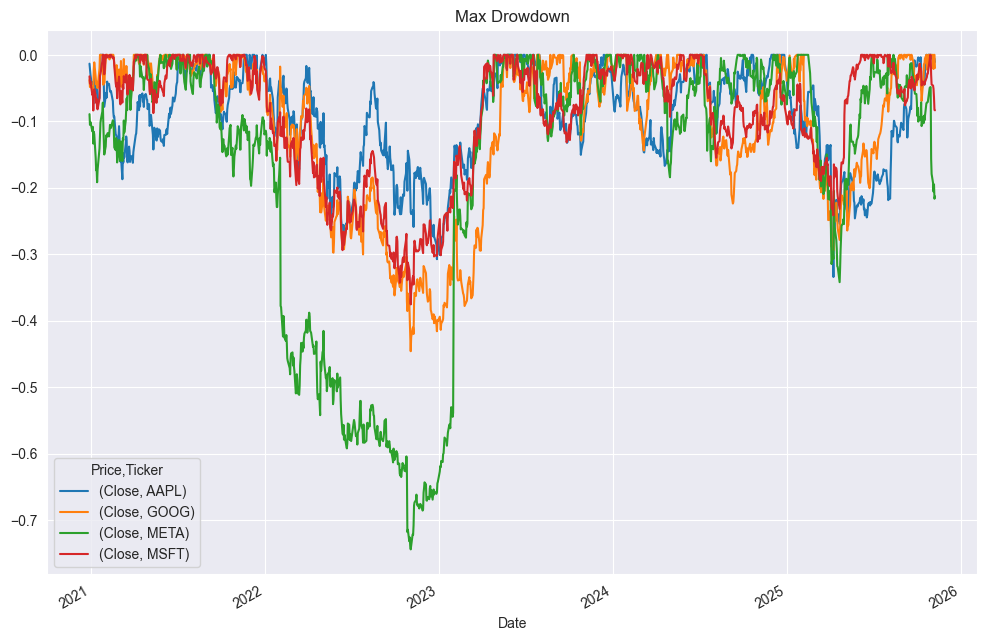

In [169]:
rolling_max = cumulative_returns.rolling(window=250).max()
max_drowdown = cumulative_returns/rolling_max - 1
max_drowdown.plot(title = "Max Drowdown", figsize = (12, 8))

Risk Metrics
Goal: Assess tail risk and loss potential.

Implement historical Value at Risk (VaR) at chosen confidence levels (e.g., 95%, 99%).

Compute Conditional VaR (CVaR) — the expected loss beyond VaR.

Compare historical vs parametric (normal assumption) VaR estimates.

Portfolio Optimization
Goal: Find optimal portfolios along the efficient frontier.

Use mean-variance optimization to minimize volatility for a given expected return.

Implement with scipy.optimize or cvxpy.

Plot the efficient frontier, mark the tangency portfolio (max Sharpe).



Backtesting
Goal: Evaluate strategy performance over time.

Simulate monthly rebalancing of portfolios (equal-weighted and optimized).

Record metrics over time (returns, volatility, Sharpe, drawdown).

Compare the performance of different strategies.



Function Modularization
Goal: Turn repeated operations into reusable code.

Write functions for:

Portfolio return computation

Sharpe, Sortino, and drawdown

VaR and CVaR

Optimization and efficient frontier

Keep your notebook clean and organized.

Visualization and Reporting
Goal: Present your findings clearly.

Plot cumulative returns, rolling Sharpe, and drawdowns.

Display VaR/CVaR distributions and efficient frontier.

Summarize metrics in a clean DataFrame or table.